### Bibliografia usada en este documento:

* https://pythonhosted.org/PyQt-Fit/NonParam_tut.html
* Wikipedia

In [7]:
from IPython.display import Image
from IPython.core.display import HTML

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Generamos y dibujamos nuestra funcion:

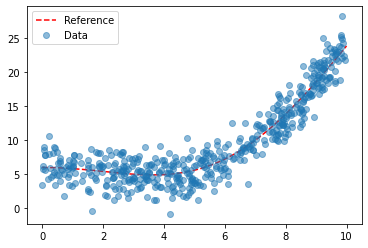

In [19]:
def f(x):
    return 3*np.cos(x/2) + x**2/5 + 3

xs = np.random.rand(512) * 10
ys = f(xs) + 2*np.random.randn(*xs.shape)

grid = np.r_[0:10:512j]
plt.plot(grid, f(grid), 'r--', label='Reference')
plt.plot(xs, ys, 'o', alpha=0.5, label='Data')
dummy = plt.legend(loc='best')

> **NOTA**: este snippet hemos usado la funcion <code style="background:grey;color:black">np.r_</code> que fusiona slices de arrays en filas, mientras que <code style="background:grey;color:black">np.c_</code> lo hace en columnas:

In [12]:
V = np.array([1,2,3,4 ])
Y = np.array([7,8,9,10])
np.r_[V[0:2],Y[0],V[3],Y[1:3]]

array([1, 2, 7, 4, 8, 9])

In [14]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

> **NOTA**: np.r_[0:3:15j] genera 15 numeros aleatorios entre 0 y 3

In [6]:
# genera 15 numeros aleatorios wntre 0 y 3
np.r_[0:3:15j]

array([0.        , 0.21428571, 0.42857143, 0.64285714, 0.85714286,
       1.07142857, 1.28571429, 1.5       , 1.71428571, 1.92857143,
       2.14285714, 2.35714286, 2.57142857, 2.78571429, 3.        ])

In [15]:
xs.shape[0]

200

we will try to use a simple Nadaraya-Watson method, or spatial averaging, using a gaussian kernel:

C:\Users\es40990421m\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2008: RuntimeWarning: overflow encountered in true_divide
  s = divide(1, s, where=large, out=s)
C:\Users\es40990421m\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:2011: RuntimeWarning: invalid value encountered in matmul
  res = matmul(transpose(vt), multiply(s[..., newaxis], transpose(u)))


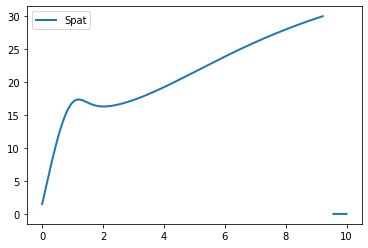

In [22]:
from statsmodels.nonparametric.kernel_regression import KernelReg

n = xs.shape[0] # numero de elementos de xs

kde = KernelReg(endog=xs, # dependent variable.
                exog=ys,     # data for the independent variable(s) Each element in the list is a separate variable
                var_type='c',          # c: continuous
                bw=[12])               # Either a user-specified bandwidth or the method for bandwidth selection

estimator = kde.fit(np.arange(n))
estimator = np.reshape(estimator[0],n)

plt.plot(grid, estimator, label="Spat", linewidth=2)
plt.legend(loc='best')

plt.show()